# Projeto C2M - COBOL to Modernization  - Itaú Unibanco

## Objetivo  
Modernizar sistemas legados baseados em COBOL, decompondo monolitos em micro-serviços utilizando técnicas de Machine Learning, com aplicação em mais de 50 grandes clientes do banco.  

## Descrição  

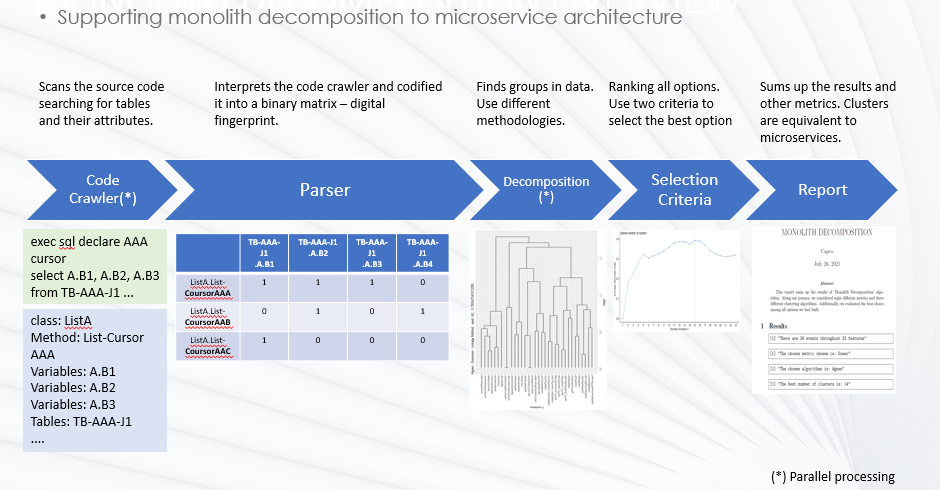

### Contexto  
O projeto teve duração de **1 ano e meio** e focou na transformação de sistemas monolíticos escritos em COBOL, amplamente utilizados por grandes clientes do Itaú, em uma arquitetura moderna baseada em micro-serviços.  

### Etapas do Projeto  
1. **Extração de Códigos COBOL**  
   - Desenvolvimento de um *crawler* para realizar o scraping dos scripts COBOL diretamente dos sistemas do banco.  
   - Criação de APIs para integração e acesso aos códigos.  

2. **Análise e Decomposição**  
   - Identificação de relações entre funções, variáveis, tabelas e *jobs* nos sistemas COBOL.  
   - Construção de uma **matriz binária** e uma **matriz de distância** para mapear interdependências entre os módulos.  
   - Aplicação de algoritmos de clusterização, como:  
     - Clusterização hierárquica.  
     - DBSCAN.  
     - Outras técnicas avaliadas para obter o melhor desempenho.  
   - Avaliação da qualidade dos clusters com métricas como:  
     - **Média da Silhueta**.  
     - **Índice de Calinski-Harabasz**.  

3. **Transformação em Micro-serviços**  
   - Identificação de micro-serviços relevantes para os clientes, como módulos específicos para **atendimento ao cliente** e outras divisões significativas.  
   - Reorganização dos módulos COBOL em micro-serviços com base nos resultados dos algoritmos.  

4. **Infraestrutura e Deploy**  
   - Utilização da **AWS** para operacionalização e deploy:  
     - **ECS** com Docker para gerenciar os micro-serviços.  
     - **AWS Lambda** para funções auxiliares e de ativação.  
   - Divisão em componentes independentes, como:  
     - Módulo de decomposição.  
     - Módulo de scraping.  

### Resultados Obtidos  
- Aplicação para mais de **50 clientes** do banco, com **ganhos significativos** em alguns casos.  
- Identificação precisa de micro-serviços, permitindo divisões mais eficientes e alinhadas às necessidades dos clientes.  
- Redução da complexidade dos sistemas legados e transição para uma arquitetura mais moderna, flexível e escalável.  

## Tecnologias Utilizadas  
- **Machine Learning**: Algoritmos de clusterização (hierárquica, DBSCAN, etc.).  
- **Métricas de Avaliação**: Média da Silhueta, Índice de Calinski-Harabasz.  
- **Linguagens**: Python (crawler, processamento).  
- **Cloud**: AWS (ECS, Lambda, Docker).  
- **Outros**: APIs para integração e automação de processos.  

---


### Abordagem alternativa de decomposição: Comunidades

**Decomposição por Grafos:**
   - Nos casos em que os dados eram insuficientes para clustering, adotamos uma abordagem baseada em grafos.
   - Construímos grafos representando as relações entre funções, onde:
     - **Nós:** Representavam funções.
     - **Arestas:** Indicavam chamadas entre funções.
   - Aplicamos algoritmos como **Louvain** e **detecção de comunidades** para identificar módulos coesos.
   - Os resultados forneciam uma alternativa eficiente para decompor o sistema em microsserviços baseados em comunidades detectadas no grafo.


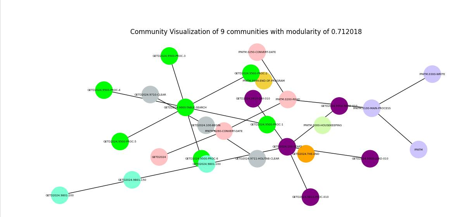

## Arquitetura da Solução


1. Cliente → Envia a sigla e inicia o fluxo via API Gateway.
- Lambda 1 → Chama a API Java para comunicação com o sistema Cobol.
- Sistema Cobol → Scripts armazenados no S3.
- Lambda 2 → Detecta novos scripts e aciona o Crawler.
  
2. Crawler (ECS):
- Processa scripts Cobol.
- Gera matriz binária.
- Armazena matriz no S3.

3. Decompositor (ECS):
- Lê matriz do S3.
- Aplica clusterização.

4. Gera relatório e armazena no S3.
- Resultado: Relatório final entregue via API Gateway ou acesso direto ao S3.

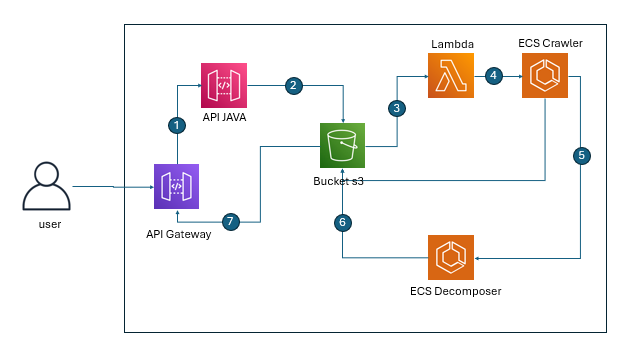